In [2]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
DIR = 'data/train'

In [4]:
img = Image.open(f"{DIR}/original_sample_500.jpg")
arr = np.array(img, dtype=np.uint8)

In [6]:
img.mode

'RGB'

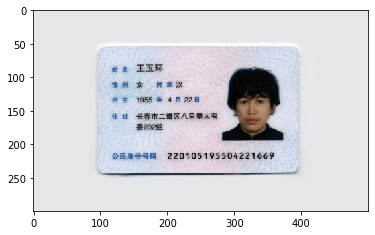

In [5]:
plt.imshow(arr);

In [37]:
mean_color = np.mean(np.mean(arr, axis=0, keepdims=True), axis=1, keepdims=True).squeeze()
mean_color = tuple(mean_color.astype(int).tolist())

In [38]:
new_dim = max(arr.shape[0], arr.shape[1])
size = (new_dim, new_dim)

In [39]:
square_img = Image.new('RGB', size, mean_color)

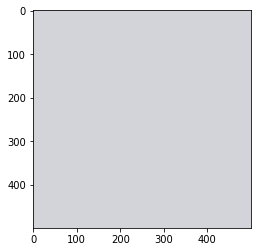

In [40]:
plt.imshow(square_img);

In [41]:
img_w, img_h = img.size
bg_w, bg_h = square_img.size
offset = ((bg_w - img_w) // 2, (bg_h - img_h) // 2)
square_img.paste(img, offset)

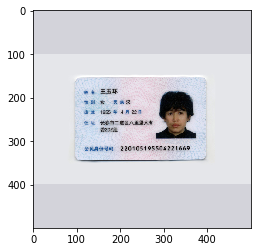

In [42]:
plt.imshow(square_img);

In [44]:
from typing import Tuple

# make pipeline

In [49]:
def get_mean_color(arr: np.array) -> Tuple[int, int, int]:
    mean_color = np.mean(np.mean(arr, axis=0, keepdims=True), axis=1, keepdims=True).squeeze()
    return tuple(mean_color.astype(int).tolist())

def get_square_size(arr: np.array) -> Tuple[int, int]:
    new_dim = max(arr.shape[0], arr.shape[1])
    return (new_dim, new_dim)

def get_offset(background: Image, img: Image) -> Tuple[int, int]:
    img_w, img_h = img.size
    bg_w, bg_h = background.size
    return ((bg_w - img_w) // 2, (bg_h - img_h) // 2)

def get_square_image(img: Image) -> Image:
    arr = np.array(img, dtype=np.uint8)
    square_img = Image.new('RGB', get_square_size(arr), get_mean_color(arr))
    square_img.paste(img, get_offset(square_img, img))
    return square_img

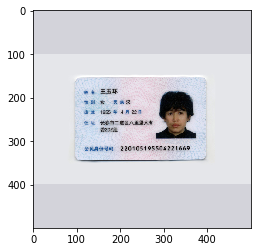

In [50]:
img = Image.open(f"{DIR}/original_sample_500.jpg")
new_img = get_square_image(img)
plt.imshow(new_img);